<a href="https://colab.research.google.com/github/sasikorn-dream/CBIR/blob/master/MNIST_Data_Basic_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Basic Approach Softmax**

In [1]:
import tensorflow as tf

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
old_v = tf.logging.get_verbosity()                          #อยากรู้ทำไมต้องใส่ก็ลอง comment ดูครับ
tf.logging.set_verbosity(tf.logging.ERROR)                  #อยากรู้ทำไมต้องใส่ก็ลอง comment ดูครับ             

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
type(mnist) #แอบดู Type

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [ ]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

จำนวนรูป train ทั้งหมด 55000 รูป

In [ ]:
mnist.train.num_examples

55000

จำนวนรูป test 10000 รูป

In [ ]:
mnist.test.num_examples

10000

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

ลองหยิบมาดูกันหน่อยหน้าตาจริงๆเป็นไง ถ้าจำกันได้ 1 รูปจะถูกเก็บไว้ใน array(784,1)

In [ ]:
mnist.train.images[1].shape

(784,)

ดังนั้นเราก็แปลงกลับมาเป็น 28x28 ซะก่อน ถึงจะดูได้ด้วย plt.imshow

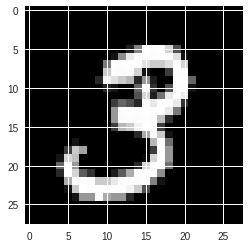

In [ ]:
image = mnist.train.images[1].reshape(28,28)
plt.imshow(image,cmap='gist_gray')

In [ ]:
image.min()

0.0

In [ ]:
image.max()

1.0

สบายใจได้ normalize มาแล้ว min = 0 , max = 1

In [ ]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32,shape=[None,784])

In [ ]:
# VARIABLES
W = tf.Variable(tf.zeros([784,10])) # weight ด้วย 0 ขนาดเท่ากับชุดข้อมูลของตัวเลข 1  ตัว เพราะมันง่ายดีไม่ต้องคิดมาก
b = tf.Variable(tf.zeros([10]))      # bias จัด 0 เท่าจำนวน label ไป


In [ ]:
# CREATE GRAPH OPERATIONS
y = tf.matmul(x,W) + b

In [ ]:
# LOSS FUNCTION
y_true = tf.placeholder(tf.float32,[None,10])

จับ y_true มาเทียบ lost กับ y ที่ predict ได้โดยใช้ softmax

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [ ]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [ ]:
# CREATE SESSION
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):  
      batch_x , batch_y = mnist.train.next_batch(100)
      sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    # EVALUATE THE MODEL
    correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(y_true,1))
    
    #[True,False,True...] --> [1,0,1,...]
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print('Accuracy:',sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

Accuracy: 0.9134
